In [8]:
import torch

from config import *
from plot.util import plot_trend_and_fft

%reload_ext autoreload
%autoreload 2

In [9]:
SPECTRAL_THRESHOLD = CONFIG['SPECTRAL_THRESHOLD']

Load matrix $Q$

In [10]:
mat_q = torch.load(out_path('mat_q.pt'), map_location=device)
mat_q.shape

torch.Size([32064, 472])

torch.Size([32064, 472])


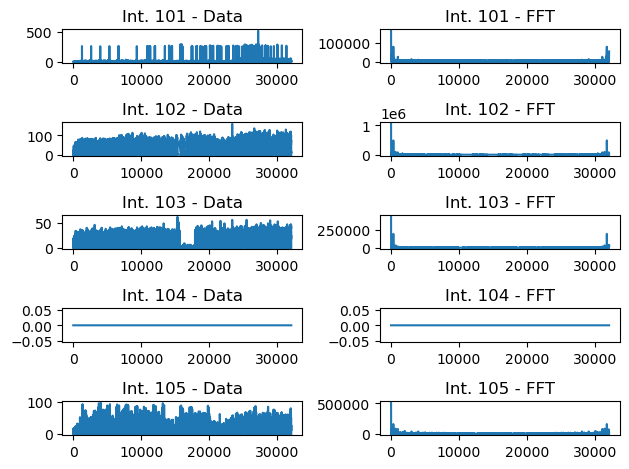

In [11]:
mat_q_fft = torch.fft.fft(mat_q, dim=0)
mat_q_fft_mag = torch.abs(mat_q_fft)
print(mat_q_fft.shape)

plot_trend_and_fft(mat_q, mat_q_fft_mag)

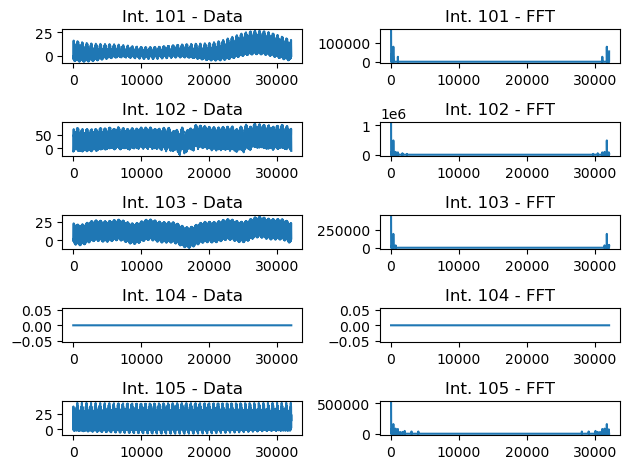

In [12]:
mat_q_trend_fft = mat_q_fft.clone()
mat_q_trend_fft[mat_q_fft_mag < SPECTRAL_THRESHOLD] = 0.0
mat_q_trend_fft_mag = torch.abs(mat_q_trend_fft)

mat_q_trend = torch.fft.ifft(mat_q_trend_fft, dim=0)
torch.save(mat_q_trend, out_path('mat_q_trend.pt'))

plot_trend_and_fft(torch.real(mat_q_trend), mat_q_trend_fft_mag)

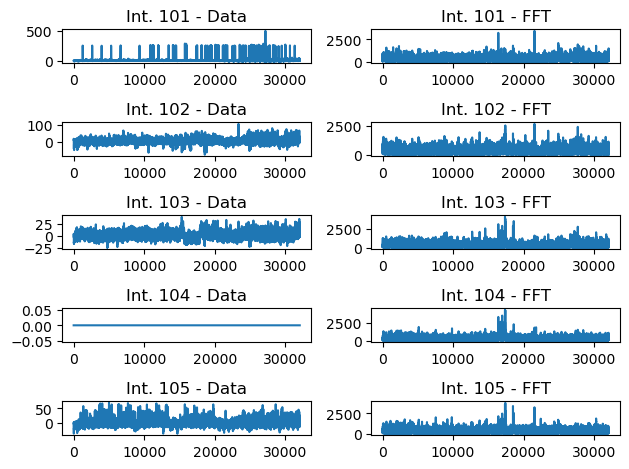

In [13]:
mat_q_resid = mat_q - mat_q_trend
torch.save(mat_q_resid, out_path('mat_q_resid.pt'))

mat_q_resid_fft_mag = torch.abs(torch.fft.fft(mat_q_resid, dim=1))

plot_trend_and_fft(torch.real(mat_q_resid), mat_q_resid_fft_mag)